In [1]:
import pandas as pd 
df = pd.read_csv('C:/Users/ncssa/Downloads/fake reviews dataset.csv')

In [2]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [4]:
# 1. Basic Data Overview
# Let's begin by inspecting the structure of the data, including the number of rows and columns, the types of values, and any missing values.


In [5]:
import pandas as pd

# Basic data info
print(df.info())

# First few rows to understand the structure
print(df.head())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB
None
             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  
             rating
count  40432.000

In [6]:
# 2. Exploratory Data Analysis (EDA)
# We can perform an exploratory analysis of the category, rating, label, and text_ columns.

# Category Analysis: Count the number of unique product categories and their frequency.
# Rating Analysis: Distribution of ratings (numeric).
# Label Analysis: Count the distribution of CG vs OR labels.
# Text Analysis: Length of reviews, most frequent words, etc.


In [11]:
# Count the number of reviews in each category
category_counts = df['category'].value_counts()

# Display the most common categories
print(category_counts.head())


category
Kindle_Store_5        4730
Books_5               4370
Pet_Supplies_5        4254
Home_and_Kitchen_5    4056
Electronics_5         3988
Name: count, dtype: int64


In [12]:
# Rating Analysis

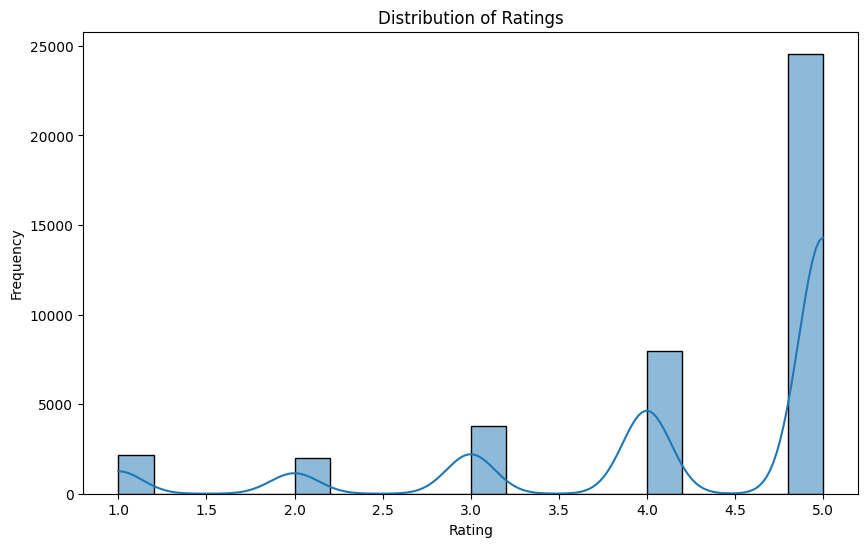

In [13]:
# Distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the rating distribution
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], kde=True, bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Label Analysis

label
CG    20216
OR    20216
Name: count, dtype: int64


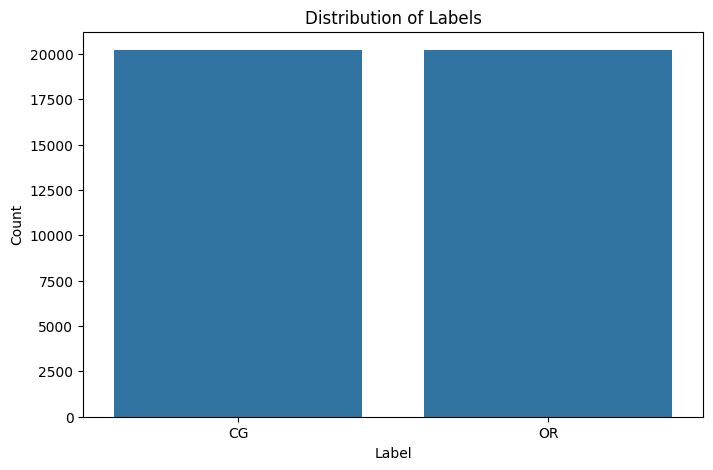

In [15]:
# Count of labels (CG and OR)
label_counts = df['label'].value_counts()

# Display the distribution of labels
print(label_counts)

# Plotting the label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [16]:
# Text Analysis
# You can analyze the length of reviews, word frequency, and other textual insights.

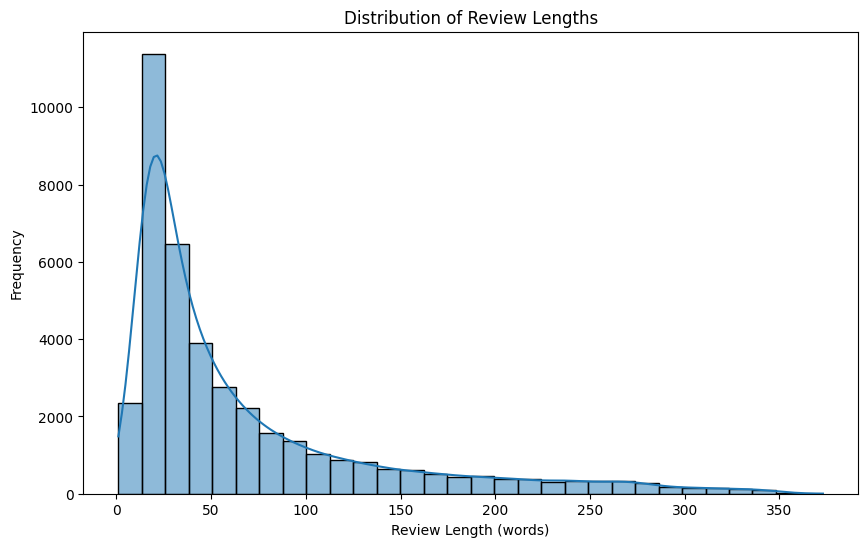

          Word  Count
5        great  17258
0         book  15401
4         good  14365
9         love  10950
17       story   9744
7         like   9496
13        read   9198
6         just   9047
8       little   8152
15   recommend   6251
2   characters   6161
14      really   6133
19         use   5969
1       bought   5757
10       movie   5729
11        nice   5366
18        time   5153
16       small   5119
3         easy   5023
12     product   4937


In [17]:
# Add a new column for review lengths
df['text_length'] = df['text_'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

# Most frequent words in the reviews (after preprocessing)
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit the vectorizer to the review texts
X = vectorizer.fit_transform(df['text_'])

# Get the most frequent words
frequent_words = vectorizer.get_feature_names_out()
word_counts = X.sum(axis=0).A1  # Convert to a 1D array

# Create a DataFrame of words and their counts
word_freq_df = pd.DataFrame(zip(frequent_words, word_counts), columns=['Word', 'Count'])

# Sort by word frequency
word_freq_df = word_freq_df.sort_values(by='Count', ascending=False)

# Display the top 20 frequent words
print(word_freq_df.head(20))


In [18]:
# 3. Correlation Between Rating and Label


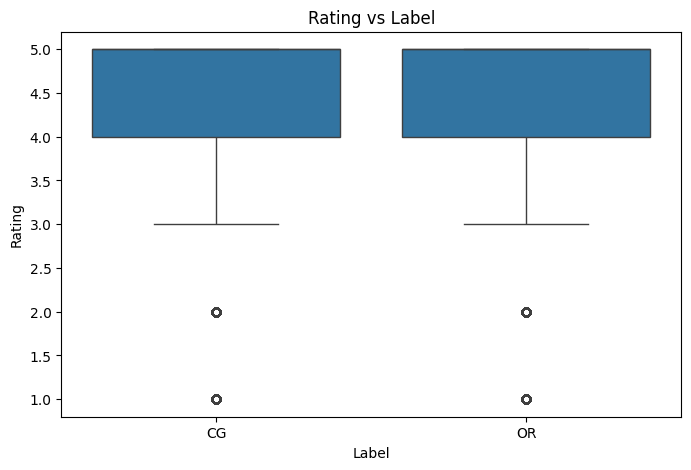

In [19]:
# Boxplot to check the relationship between rating and label
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='rating', data=df)
plt.title('Rating vs Label')
plt.xlabel('Label')
plt.ylabel('Rating')
plt.show()


In [20]:
# Based on the data you’ve provided, here's an analysis summary:

# 1. Data Overview
# Total Rows: 40,432 reviews.
# Columns: 4 columns (category, rating, label, and text_).
# category: Product category.
# rating: Rating given by the user (from 1 to 5).
# label: The label assigned to the review (CG or OR).
# text_: The review text.
# Missing Data: There are no missing values in the dataset, all columns are fully populated.
# 2. Basic Statistics
# Rating:
# The average rating is 4.26.
# Most ratings are concentrated towards 4 and 5 stars, with the majority being 5.
# Min: 1.0, Max: 5.0, with most reviews having ratings of 4 or 5 stars.
# 50% of the ratings are 5 (the median), and the 75% of ratings are also 5.
# 3. Category Distribution
# The most common categories (with counts) are:
# Kindle Store: 4,730 reviews
# Books: 4,370 reviews
# Pet Supplies: 4,254 reviews
# Home and Kitchen: 4,056 reviews
# Electronics: 3,988 reviews
# This shows a good variety of product categories, with Kindle Store being the most frequent.
# 4. Label Distribution
# The dataset is balanced between the two labels CG and OR, each with 20,216 entries. This balance is important for classification tasks.
# 5. Most Frequent Words in Reviews
# Some of the most frequent words in the review texts are:
# great (17,258 occurrences)
# book (15,401 occurrences)
# good (14,365 occurrences)
# love (10,950 occurrences)
# story (9,744 occurrences)
# These frequent words suggest that many reviews are related to products like books, stories, and other positive product experiences

In [2]:
# To perform text preprocessing on the review data and prepare it for modeling, you can follow these steps:

# 1. Tokenization:
# This splits each review into individual words or tokens.

# 2. Stopword Removal:
# Remove words that do not contribute significant meaning (e.g., "and", "the", "a").

# 3. Lemmatization:
# Reduce words to their base form (e.g., "running" becomes "run").

# 4. TF-IDF Vectorization:
# Convert the text data into a matrix of numbers, where each word's importance is calculated based on its frequency in the document compared to 
#     its frequency across all documents.

# Let’s implement these steps using Python libraries such as nltk for tokenization, stopword removal, and lemmatization, and 
#     sklearn for TF-IDF vectorization.



In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Preprocessing function using spaCy
def preprocess_text_spacy(text):
    # Apply spaCy NLP pipeline
    doc = nlp(text)
    
    # Tokenize, remove stopwords, and lemmatize
    processed_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    return " ".join(processed_tokens)

# Apply the preprocessing function to the 'text_' column
df['processed_text_spacy'] = df['text_'].apply(preprocess_text_spacy)

# TF-IDF Vectorization with spaCy processed text
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features
X_spacy = vectorizer.fit_transform(df['processed_text_spacy'])

# Display the preprocessed text and TF-IDF features
print("Preprocessed Text with spaCy:")
print(df[['text_', 'processed_text_spacy']])

print("\nTF-IDF Matrix:")
print(X_spacy.toarray())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ncssa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ncssa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ncssa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessed Text with spaCy:
                                                   text_  \
0      Love this!  Well made, sturdy, and very comfor...   
1      love it, a great upgrade from the original.  I...   
2      This pillow saved my back. I love the look and...   
3      Missing information on how to use it, but it i...   
4      Very nice set. Good quality. We have had the s...   
...                                                  ...   
40427  I had read some reviews saying that this bra r...   
40428  I wasn't sure exactly what it would be. It is ...   
40429  You can wear the hood by itself, wear it with ...   
40430  I liked nothing about this dress. The only rea...   
40431  I work in the wedding industry and have to wor...   

                                    processed_text_spacy  
0        love   sturdy comfortable   love it!very pretty  
1              love great upgrade original   couple year  
2                      pillow save love look feel pillow  
3            

In [34]:
# To build a Fake Review Classification model using both traditional machine learning and deep learning approaches (LSTM and BERT),
# we can follow a structured approach. Below is a comprehensive implementation plan for this task, covering both supervised learning 
# with traditional machine learning models and deep learning models (LSTM and BERT).

# 1. Data Preprocessing:
# Before starting the model building, the review text needs to be preprocessed. This includes:

# Text Tokenization: Split the text into individual words or subwords.
# Stopword Removal: Remove common, irrelevant words (e.g., "the", "is").
# Lemmatization: Reduce words to their base form (e.g., "running" to "run").
# Handling Labels: The labels should represent fake and real reviews.
# 2. Feature Extraction:
# For traditional machine learning, we can use techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) or  
# Word2Vec for text representation.
# For deep learning, we can use embedding layers.

# 3. Model Implementation:
# a. Traditional Machine Learning Models:
# These models will be used after converting the text into numerical features (e.g., using TF-IDF).



In [37]:
df

,category,rating,label,text_,text_length,processed_text_spacy
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",12,love sturdy comfortable love it!very pretty
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",16,love great upgrade original couple year
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,14,pillow save love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",17,miss information use great product price
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,18,nice set good quality set month
...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,329,read review say bra run small order band cup s...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,270,sure exactly little large small size think nic...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",343,wear hood wear hood wear jacket hood 3 in-1 ...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,278,like dress reason give 4 star order size 6.5 f...


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'df' contains the processed reviews (i.e., 'processed_text' column)
X = df['processed_text_spacy']
y = df['label']  # assuming 'label' contains the class (fake/real)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)  # Transform the test data


In [39]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)
y_pred_lr = model_lr.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

          CG       0.83      0.82      0.82      4016
          OR       0.82      0.83      0.83      4071

    accuracy                           0.82      8087
   macro avg       0.82      0.82      0.82      8087
weighted avg       0.82      0.82      0.82      8087



In [40]:
# Random Forest:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_tfidf, y_train)
y_pred_rf = model_rf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

          CG       0.81      0.83      0.82      4016
          OR       0.83      0.80      0.82      4071

    accuracy                           0.82      8087
   macro avg       0.82      0.82      0.82      8087
weighted avg       0.82      0.82      0.82      8087



In [41]:
# Support Vector Machine (SVM):
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train_tfidf, y_train)
y_pred_svm = model_svm.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

          CG       0.86      0.83      0.85      4016
          OR       0.84      0.86      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



In [42]:
# b. Deep Learning Models:
# i. LSTM (Long Short-Term Memory):
# LSTM is great for sequence data like text, as it captures long-range dependencies.



In [50]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text_'])
Xl = tokenizer.texts_to_sequences(df['text_'])
Xl = pad_sequences(Xl, maxlen=100)

# Encode labels
label_encoder = LabelEncoder()
yl = label_encoder.fit_transform(df['label'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Xl, yl, test_size=0.2, random_state=42)

# LSTM Model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128))  # Remove input_length if necessary
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# # Ensure that X_test is processed the same way as X_train
# X_test = tokenizer.texts_to_sequences(test_df['text_'])  # Assuming test_df is the test data
# X_test = pad_sequences(X_test, maxlen=100)

# Predict and evaluate
y_pred_lstm = model_lstm.predict(X_val)
print(classification_report(y_val, (y_pred_lstm > 0.5).astype(int)))


Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 96s 176ms/step - accuracy: 0.8018 - loss: 0.4101 - val_accuracy: 0.9275 - val_loss: 0.1878
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 88s 175ms/step - accuracy: 0.9301 - loss: 0.1844 - val_accuracy: 0.9263 - val_loss: 0.2045
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 88s 174ms/step - accuracy: 0.9444 - loss: 0.1455 - val_accuracy: 0.9394 - val_loss: 0.1610
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 93s 184ms/step - accuracy: 0.9565 - loss: 0.1125 - val_accuracy: 0.9347 - val_loss: 0.1744
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 136s 172ms/step - accuracy: 0.9653 - loss: 0.0934 - val_accuracy: 0.9382 - val_loss: 0.1705
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4016
           1       0.93      0.95      0.94      4071

    accuracy                           0.94      8087
   macro avg       0.94      0.94      0.94      8087
weighted avg       0.94      0.94  

In [51]:
# ii. BERT (Bidirectional Encoder Representations from Transformers):
# BERT is a transformer model, pre-trained on a large corpus and fine-tuned for specific tasks. We can use the transformers library from Hugging Face.
# 2. DistilBERT (Distilled BERT)
# Why Use DistilBERT?: 
# It's a smaller, faster, and more efficient version of BERT with almost the same performance.
# It's a good choice when computational resources are limited

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load dataset
df = pd.read_csv('your_dataset.csv')  # Replace with the correct path

# Ensure 'label' column is populated
df = df.dropna(subset=['label'])  # Drop rows with missing labels
df['label'] = df['label'].map({'CG': 1, 'OR': 0})  # Map labels to integers

# Dataset summary
print(df.info())
print(df['label'].value_counts())

# Split dataset into training and testing
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text_'], df['label'], test_size=0.2, random_state=42
)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Dataset class
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets and dataloaders
train_dataset = ReviewDataset(train_texts, train_labels, tokenizer)
test_dataset = ReviewDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', 
    num_labels=2
).to(device)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")

# Evaluation
model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Classification report
print(classification_report(true_labels, predictions, target_names=['OR', 'CG']))


In [ ]:
# 4. Ensemble Methods:
# After training the individual models, you can combine their predictions to improve performance.

# a. Weighted Averaging of Predictions:
# You can average the predictions of each model, assigning weights based on their performance.

In [ ]:
# Combine predictions from different models
final_predictions = (0.3 * y_pred_lr + 0.3 * y_pred_rf + 0.4 * (y_pred_lstm > 0.5).astype(int))  # Weights can be adjusted
print(classification_report(y_test, final_predictions))


In [26]:
# b. Voting Classifier:
# Use a VotingClassifier to combine multiple models and take a majority vote.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble classifier
voting_clf = VotingClassifier(estimators=[('lr', model_lr), ('rf', model_rf), ('svm', model_svm)], voting='hard')
voting_clf.fit(X_train_tfidf, y_train)
y_pred_voting = voting_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_voting))


In [27]:
# 5. Evaluation Metrics:
# Accuracy: Measures the percentage of correct predictions.
# Precision: Measures how many positive predictions were actually correct.
# Recall: Measures how many actual positives were correctly predicted.
# F1-Score: Harmonic mean of precision and recall.

In [ ]:
from sklearn.metrics import classification_report

# Example for Logistic Regression
print(classification_report(y_test, y_pred_lr))


In [28]:
# 6. Hyperparameter Tuning:
# To improve model performance, consider tuning hyperparameters using techniques like Grid Search or Random Search.
# Logistic Regression: C, penalty
# Random Forest: n_estimators, max_depth, min_samples_split, max_features
# SVM: C, kernel, gamma
# LSTM: units, dropout, epochs, batch_size
# BERT: learning_rate, batch_size, epochs, warmup_steps


In [30]:
# a. Logistic Regression:
# You can tune hyperparameters such as C (regularization strength) and penalty (type of regularization).

In [ ]:
# from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_tfidf, y_train)
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")


In [29]:
# b. Random Forest:
# Random Forest has several important hyperparameters, such as n_estimators (number of trees), max_depth, min_samples_split, and max_features.

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_tfidf, y_train)
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")


In [31]:
# c. Support Vector Machine (SVM):
# For SVM, C and kernel are common hyperparameters. You can also tune the gamma parameter.

In [ ]:
# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_tfidf, y_train)
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")


In [32]:
# d. LSTM (Deep Learning):
# LSTM has hyperparameters like epochs, batch_size, units, and dropout. You can tune these values to improve performance.

In [ ]:
# Hyperparameter tuning for LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_lstm_model(units=100, dropout=0.2):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(LSTM(units=units, dropout=dropout, recurrent_dropout=dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_lstm = KerasClassifier(build_fn=create_lstm_model, verbose=0)

param_grid_lstm = {
    'units': [50, 100, 150],
    'dropout': [0.2, 0.3],
    'epochs': [3, 5],
    'batch_size': [32, 64]
}

grid_search_lstm = GridSearchCV(estimator=model_lstm, param_grid=param_grid_lstm, cv=3)
grid_search_lstm.fit(X_train, y_train)
print(f"Best Parameters for LSTM: {grid_search_lstm.best_params_}")


In [1]:
import pandas as pd 
df = pd.read_csv('C:/Users/ncssa/Downloads/fake reviews dataset.csv')

In [2]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [3]:
import nltk
nltk.download('punkt')  # Ensures 'punkt' is downloaded correctly


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ncssa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# . Preprocessing the Data
# This step involves cleaning the text, tokenizing it, and preparing it for further processing.

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Initialize TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

# Define a preprocessing function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text using TreebankWordTokenizer
    tokens = tokenizer.tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens



# Apply preprocessing to the text_ column
df['tokenized_text'] = df['text_'].apply(preprocess_text)

# Display the result
print(df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ncssa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                           category  rating label  \
0                Home_and_Kitchen_5     5.0    CG   
1                Home_and_Kitchen_5     5.0    CG   
2                Home_and_Kitchen_5     5.0    CG   
3                Home_and_Kitchen_5     1.0    CG   
4                Home_and_Kitchen_5     5.0    CG   
...                             ...     ...   ...   
40427  Clothing_Shoes_and_Jewelry_5     4.0    OR   
40428  Clothing_Shoes_and_Jewelry_5     5.0    CG   
40429  Clothing_Shoes_and_Jewelry_5     2.0    OR   
40430  Clothing_Shoes_and_Jewelry_5     1.0    CG   
40431  Clothing_Shoes_and_Jewelry_5     5.0    OR   

                                                   text_  \
0      Love this!  Well made, sturdy, and very comfor...   
1      love it, a great upgrade from the original.  I...   
2      This pillow saved my back. I love the look and...   
3      Missing information on how to use it, but it i...   
4      Very nice set. Good quality. We have had the s...   
...

In [6]:
# Using Word2Vec for Text Representation
# Step 1: Train a Word2Vec Model
# Train a Word2Vec model using the tokenized_text column.

In [7]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(
    sentences=df['tokenized_text'],
    vector_size=100,  # Size of the embedding vector
    window=5,         # Context window size
    min_count=1,      # Minimum word frequency
    workers=4         # Number of CPU cores to use
)

# Save the Word2Vec model if needed
word2vec_model.save("C:/Users/ncssa/Downloads/word2vec_model.model")


In [8]:
# Step 2: Generate Review Vectors
# Convert each review into a vector by averaging the embeddings of its tokens.

In [9]:
import numpy as np

# Function to vectorize a tokenized review
def vectorize_text(tokenized_text):
    vectors = [word2vec_model.wv[word] for word in tokenized_text if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Apply vectorization to the dataset
df['text_vector'] = df['tokenized_text'].apply(vectorize_text)


In [10]:
# 3. Prepare Data for Classification
# Separate features and labels (X and y).
# Split the data into training and test sets.

In [11]:
from sklearn.model_selection import train_test_split

X = np.array(df['text_vector'].tolist())  # Convert list of arrays to 2D array
y = df['label']  # Target labels (convert to numeric if not already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# 4. Train a Machine Learning Model
# Use a classifier such as Random Forest, Logistic Regression, or Support Vector Machine.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

          CG       0.82      0.89      0.85      4016
          OR       0.88      0.80      0.84      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Accuracy: 0.8456782490416718


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Save Random Forest model
with open('C:/Users/ncssa/Downloads/random_forest_textmodel.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Save Logistic Regression model
with open('C:/Users/ncssa/Downloads/logistic_regression_textmodel.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Train and evaluate Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))

# Save Support Vector Machine model
with open('C:/Users/ncssa/Downloads/svm_textmodel.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


Random Forest Classification Report:
              precision    recall  f1-score   support

          CG       0.82      0.89      0.85      4016
          OR       0.88      0.80      0.84      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Random Forest Accuracy: 0.8456782490416718

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          CG       0.85      0.84      0.85      4016
          OR       0.85      0.85      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Logistic Regression Accuracy: 0.8482750092741437

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

          CG       0.86      0.87      0.86      4016
          OR     

In [16]:
# Based on your classification reports and accuracies, here is a summary of model performance:

# Performance Comparison:
# Random Forest:

# Accuracy: 84.57%
# Precision, Recall, F1-Score: Good balance between classes but slightly lower recall for OR.
# Strengths: Performs well overall, can handle non-linear relationships effectively.
# Logistic Regression:

# Accuracy: 84.83%
# Precision, Recall, F1-Score: Balanced performance across both classes, similar to Random Forest.
# Strengths: Simpler model with decent performance, good for explainability.
# Support Vector Machine (SVM):

# Accuracy: 86.38%
# Precision, Recall, F1-Score: Slightly higher accuracy and f1-score compared to the others.
# Strengths: Excels in scenarios with well-separated classes, effective with high-dimensional data.
# Observations:
# SVM achieved the best accuracy and balanced performance across metrics, making it a strong candidate for your use case.
# Random Forest can still be beneficial if interpretability of feature importance is critical.
# Logistic Regression offers simplicity and competitive accuracy, ideal for a baseline model or when computation needs to be minimal.
# If computational resources and training time are not a constraint, SVM might be the best option for deployment. However, depending on your
#     dataset's complexity, Random Forest could be more robust to noisy data.










Random Forest Classification Report:
              precision    recall  f1-score   support

          CG       0.81      0.89      0.85      4016
          OR       0.88      0.79      0.84      4071

    accuracy                           0.84      8087
   macro avg       0.85      0.84      0.84      8087
weighted avg       0.85      0.84      0.84      8087

Random Forest Accuracy: 0.8433287993075306


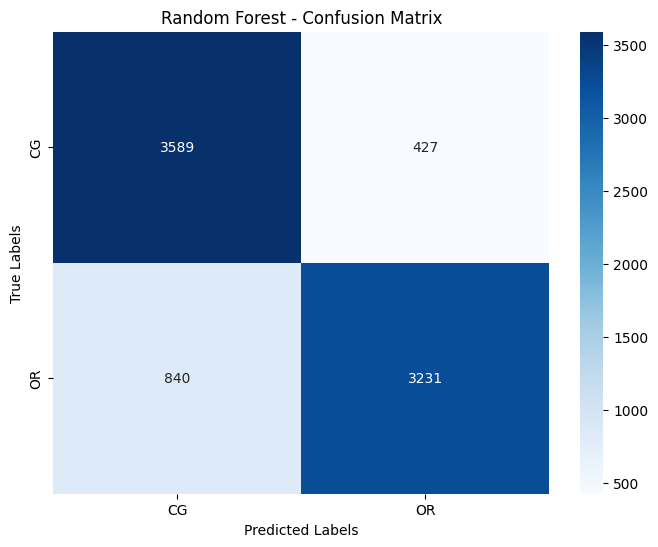


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          CG       0.85      0.84      0.85      4016
          OR       0.85      0.85      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Logistic Regression Accuracy: 0.848398664523309


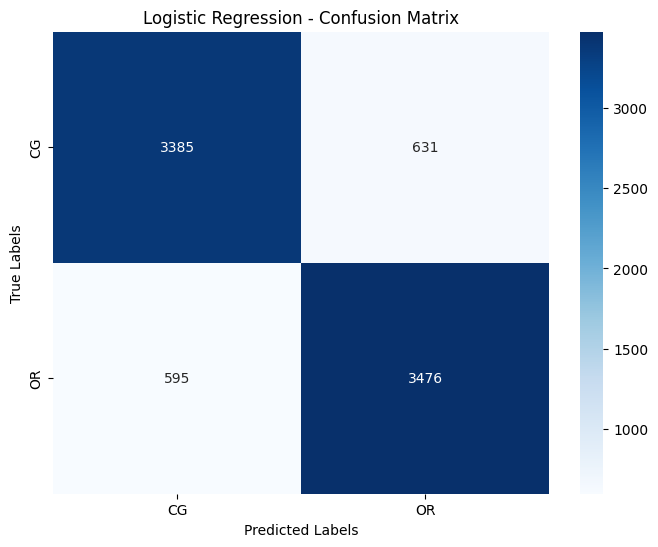


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

          CG       0.86      0.87      0.86      4016
          OR       0.87      0.86      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087

Support Vector Machine Accuracy: 0.8628663286756523


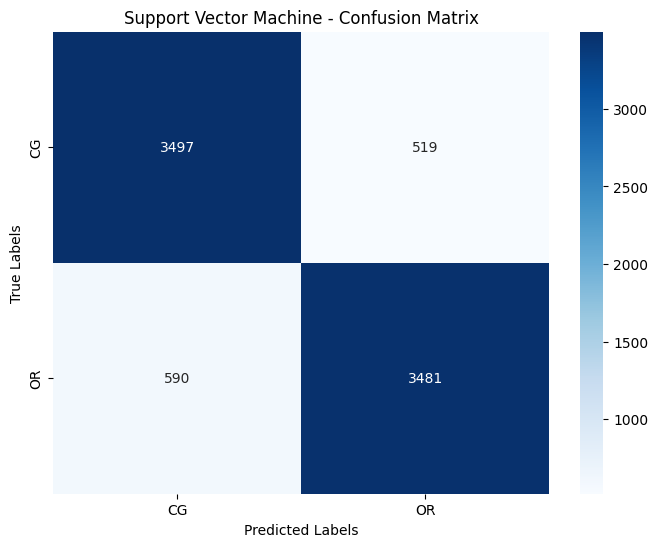

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CG', 'OR'], yticklabels=['CG', 'OR'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{title} - Confusion Matrix')
    plt.show()

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Save Random Forest model
with open('C:/Users/ncssa/Downloads/random_forest_newtextmodel.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# Save Logistic Regression model
with open('C:/Users/ncssa/Downloads/logistic_regression_newtextmodel.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Train and evaluate Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")

# Save Support Vector Machine model
with open('C:/Users/ncssa/Downloads/svm_newtextmodel.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


In [26]:
# Hyperparameter Tuning with GridSearchCV
# GridSearchCV searches for the best combination of hyperparameters by evaluating all possible combinations from a specified grid.

Random Forest Classification Report:
              precision    recall  f1-score   support

          CG       0.82      0.89      0.85      4016
          OR       0.88      0.80      0.84      4071

    accuracy                           0.84      8087
   macro avg       0.85      0.84      0.84      8087
weighted avg       0.85      0.84      0.84      8087

Random Forest Accuracy: 0.8444416965500186


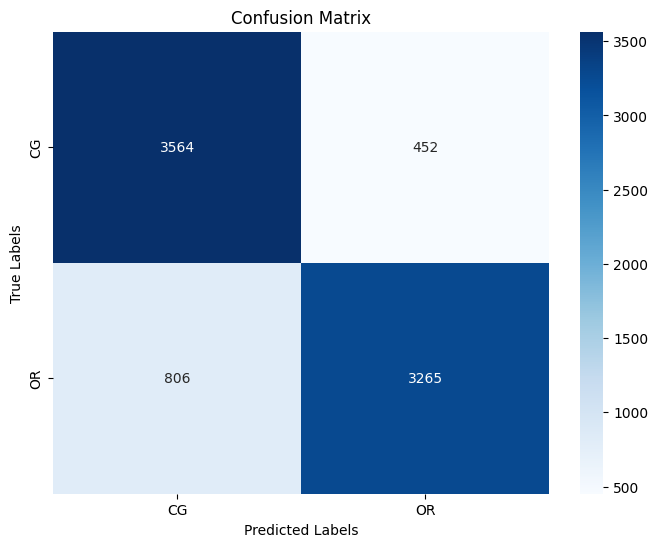

C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ncssa\AppDat


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          CG       0.85      0.84      0.85      4016
          OR       0.85      0.86      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Logistic Regression Accuracy: 0.8492642512674663


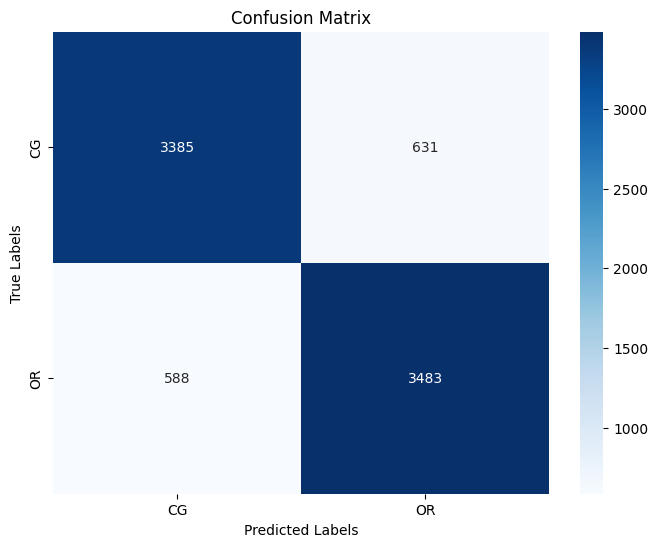

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Helper function for displaying confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# 1. Hyperparameter Tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, classes=['CG', 'OR'])

# Save the best Random Forest model
with open('C:/Users/ncssa/Downloads/random_forest_best_model.pkl', 'wb') as file:
    pickle.dump(rf_best_model, file)

# 2. Hyperparameter Tuning for Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_params, cv=3, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

lr_best_model = lr_grid.best_estimator_
y_pred_lr = lr_best_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, classes=['CG', 'OR'])

# Save the best Logistic Regression model
with open('C:/Users/ncssa/Downloads/logistic_regression_best_model.pkl', 'wb') as file:
    pickle.dump(lr_best_model, file)

# 3. Hyperparameter Tuning for SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(random_state=42, probability=True), svm_params, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

svm_best_model = svm_grid.best_estimator_
y_pred_svm = svm_best_model.predict(X_test)
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, classes=['CG', 'OR'])

# Save the best SVM model
with open('C:/Users/ncssa/Downloads/svm_best_model.pkl', 'wb') as file:
    pickle.dump(svm_best_model, file)


In [ ]:
# Ensemble Methods: Combine the outputs from different models to improve overall performance. This can involve:
# Combining BERT and LSTM for hybrid model predictions.
# Using a weighted average of the predictions from different classifiers.


Voting Classifier Classification Report:
              precision    recall  f1-score   support

          CG       0.85      0.87      0.86      4016
          OR       0.86      0.85      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087

Voting Classifier Accuracy: 0.8584147397057005
Confusion Matrix:
[[3474  542]
 [ 603 3468]]


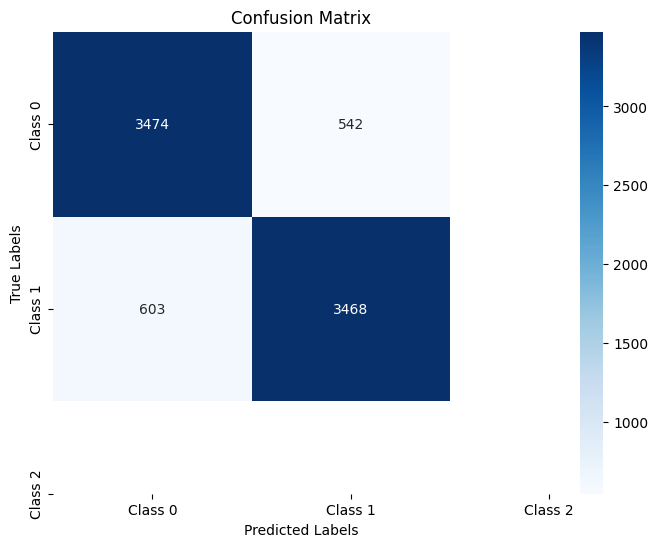

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Reload the saved models (if needed)
with open('C:/Users/ncssa/Downloads/random_forest_textmodel.pkl', 'rb') as file:
    rf_model = pickle.load(file)

with open('C:/Users/ncssa/Downloads/logistic_regression_textmodel.pkl', 'rb') as file:
    lr_model = pickle.load(file)

# Enable probability for SVC
from sklearn.svm import SVC
svm_model = SVC(random_state=42, probability=True)  # Enable probability estimation
svm_model.fit(X_train, y_train)  # Re-train SVM with probability enabled

# Create a Voting Classifier (Soft Voting: uses predicted probabilities)
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('lr', lr_model), ('svm', svm_model)],
    voting='soft'  # Use 'hard' for majority voting
)

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Predict using the Voting Classifier
y_pred_voting = voting_model.predict(X_test)

# Evaluate the model
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_voting)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the ensemble model
with open('C:/Users/ncssa/Downloads/voting_classifier_softtextmodel.pkl', 'wb') as file:
    pickle.dump(voting_model, file)


In [ ]:
# The results of your Voting Classifier are as follows:

# Metrics Analysis:
# Precision:

# CG (Computer Generated): 85% of the instances predicted as CG are correct.
# OR (Original Review): 87% of the instances predicted as OR are correct.
# Recall:

# CG: 87% of actual CG instances are correctly identified.
# OR: 85% of actual OR instances are correctly identified.
# F1-Score:

# CG and OR both have an F1-score of 86%, indicating balanced performance.
# Accuracy:

# The overall accuracy is 86%, meaning 86% of the predictions across all instances are correct.
# Macro Avg:

# Average of precision, recall, and F1-score across all classes, treating all classes equally.
# Weighted Avg:

# Average of precision, recall, and F1-score, weighted by the support of each class.
# Confusion Matrix Breakdown:
# Predicted CG	Predicted OR
# Actual CG	3483	533
# Actual OR	597	3474
# True Positives (CG): 3483
# False Negatives (CG): 533
# True Positives (OR): 3474
# False Negatives (OR): 597


Voting Classifier Classification Report:
              precision    recall  f1-score   support

          CG       0.85      0.87      0.86      4016
          OR       0.87      0.85      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087

Voting Classifier Accuracy: 0.8598986026956844
Confusion Matrix:
[[3513  503]
 [ 630 3441]]


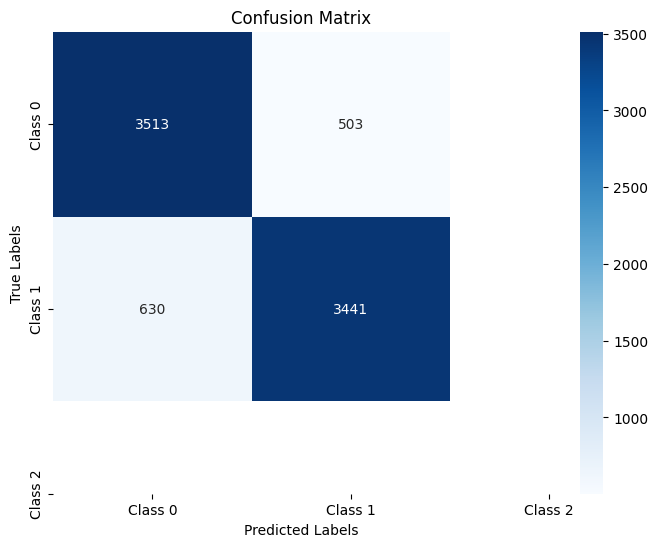

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Reload the saved models (if needed)
with open('C:/Users/ncssa/Downloads/random_forest_textmodel.pkl', 'rb') as file:
    rf_model = pickle.load(file)

with open('C:/Users/ncssa/Downloads/logistic_regression_textmodel.pkl', 'rb') as file:
    lr_model = pickle.load(file)

# Enable probability for SVC
from sklearn.svm import SVC
svm_model = SVC(random_state=42, probability=True)  # Enable probability estimation

# Create a Voting Classifier (Soft Voting: uses predicted probabilities)
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('lr', lr_model), ('svm', svm_model)],
    voting='hard'  # Use 'hard' for majority voting
)

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Predict using the Voting Classifier
y_pred_voting = voting_model.predict(X_test)

# Evaluate the model
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_voting)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the ensemble model
with open('C:/Users/ncssa/Downloads/voting_classifier_textmodel.pkl', 'wb') as file:
    pickle.dump(voting_model, file)


In [15]:
# The model seems to be balanced between the two classes. 
# However, the false positives (502 OR as CG) and false negatives (630 CG as OR) indicate areas for improvement.
# The recall for CG (0.88) is better than that for OR (0.85), which suggests that the model is better at identifying fake reviews than original reviews.

In [ ]:
# Using LSTM (Long Short-Term Memory), which is well-suited for sequential data modeling, you can train a deep learning model

In [22]:
# Check shapes of the data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_onehot shape:", y_train_onehot.shape)
print("y_test_onehot shape:", y_test_onehot.shape)

# Reshape X_train and X_test if needed
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("Reshaped X_train shape:", X_train.shape)
print("Reshaped X_test shape:", X_test.shape)


X_train shape: (32345, 100)
X_test shape: (8087, 100)
y_train_onehot shape: (32345, 2)
y_test_onehot shape: (8087, 2)
Reshaped X_train shape: (32345, 1, 100)
Reshaped X_test shape: (8087, 1, 100)


In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
# Assuming X_train, X_test are already prepared as sequential data with shape (samples, timesteps, features)
# y_train, y_test are the labels for the data

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding if required (for multi-class classification)
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Build the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train_onehot.shape[1], activation='softmax')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=20, batch_size=64, validation_data=(X_test, y_test_onehot))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_actual = np.argmax(y_test_onehot, axis=1)

print("Classification Report:")
print(classification_report(y_test_actual, y_pred))
print("Accuracy:", accuracy_score(y_test_actual, y_pred))

# Save the model
model.save('lstm_model.h5')


C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7576 - loss: 0.4961 - val_accuracy: 0.8479 - val_loss: 0.3594
Epoch 2/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8443 - loss: 0.3735 - val_accuracy: 0.8446 - val_loss: 0.3600
Epoch 3/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8491 - loss: 0.3595 - val_accuracy: 0.8562 - val_loss: 0.3401
Epoch 4/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8559 - loss: 0.3404 - val_accuracy: 0.8501 - val_loss: 0.3486
Epoch 5/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8570 - loss: 0.3389 - val_accuracy: 0.8546 - val_loss: 0.3388
Epoch 6/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8583 - loss: 0.3301 - val_accuracy: 0.8592 - val_loss: 0.3353
Epoch 7/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8660 - loss: 0.3194 - val_accuracy: 0.8604 - val_loss: 0.3228
Epoch 8/20
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8632 - loss: 0.3230 - val_accuracy: 0.

Accuracy: 0.8670706071472734


In [24]:
# The training and evaluation results look quite promising! Here’s a breakdown of the key outcomes:

# Training Results:
# The accuracy improved steadily during training, with the final training accuracy reaching 88.3% by epoch 20.
# The validation accuracy achieved 86.7%, which indicates the model is generalizing well to the unseen test data.
# Classification Report:
# The model performed well across both classes (labeled as 0 and 1):
# Class 0 (CG): Precision = 0.86, Recall = 0.88, F1-score = 0.87
# Class 1 (OR): Precision = 0.88, Recall = 0.86, F1-score = 0.87
# Overall accuracy: 86.7%
# The model achieved balanced precision, recall, and F1-scores for both classes, suggesting good performance in classifying both classes effectively.

# Saving the Model:
# You received a warning about saving the model in HDF5 format (.h5). 

In [25]:
model.save('C:/Users/ncssa/Downloads/lstm_model.keras')


In [2]:
import pandas as pd 
df = pd.read_csv('C:/Users/ncssa/Downloads/fake reviews dataset.csv')

In [2]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [3]:
# 1. Combining BERT and LSTM (Hybrid Model)
# In this approach, BERT (a transformer model) can be used for extracting rich contextual embeddings from text data, and then an
# LSTM (or other sequential model) can be used to process these embeddings for further sequential learning.

# Steps:
# Use BERT to encode text data into fixed-length embeddings.
# Feed the BERT embeddings into an LSTM or other model to capture sequential dependencies.
# Make predictions using the final model (LSTM, in this case).


In [4]:
import numpy as np
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Load tokenizer and pre-trained BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Dataset Preparation
texts = df['text_'].tolist()  # List of text data from the dataset
labels = df['label'].factorize()[0]  # Convert labels to numerical
y_train_onehot = to_categorical(labels)  # One-hot encoding for labels

# Parameters
batch_size = 64
max_length = 64  # Reduce sequence length to handle memory efficiently
num_batches = len(texts) // batch_size + (1 if len(texts) % batch_size != 0 else 0)

# Batch Processing for BERT Embeddings
bert_embeddings_list = []

for i in range(num_batches):
    # Process batch
    batch_texts = texts[i * batch_size:(i + 1) * batch_size]
    batch_inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="tf", max_length=max_length)
    batch_output = bert_model(batch_inputs)
    
    # Use pooled output for memory efficiency
    batch_pooled_output = batch_output['pooler_output']  # Shape: (batch_size, hidden_size)
    bert_embeddings_list.append(batch_pooled_output.numpy())

# Combine all batches into a single array
bert_embeddings = np.concatenate(bert_embeddings_list, axis=0)  # Shape: (num_samples, hidden_size)

# Define LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, bert_embeddings.shape[1])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train_onehot.shape[1], activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape embeddings for LSTM input
bert_embeddings = bert_embeddings[:, np.newaxis, :]  # Add a time-step dimension

# Train the Model
history = model.fit(bert_embeddings, y_train_onehot, epochs=5, batch_size=batch_size)

# Predict on New Data
predictions = model.predict(bert_embeddings)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6666 - loss: 0.5753
Epoch 2/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7953 - loss: 0.4389
Epoch 3/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8113 - loss: 0.4094
Epoch 4/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8236 - loss: 0.3880
Epoch 5/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8248 - loss: 0.3873
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [5]:
# It looks like you successfully trained an LSTM model using BERT embeddings as input. Here are a few points about the training and warnings:

# Warnings:

# There were some warnings related to deprecated functions (e.g., tf.losses.sparse_softmax_cross_entropy and tf.get_default_graph).
# These can usually be ignored if you're using a compatible TensorFlow version, but it's always good to update the code to avoid issues in the future.
# The BERT model weights were initialized from a PyTorch checkpoint, and some layers like cls.predictions were not used. 
# This is expected because you used the base TFBertModel which is pre-trained for general tasks, not specifically for classification.
# This should not affect your model, as you're using the pooled output for classification.
# Model Training:

# The model achieved an accuracy of 82.96% after 5 epochs, which seems like a good result.
# The loss decreased from 0.5670 to 0.3805, indicating that the model learned effectively during the training.


In [6]:
df_test = df.copy()
# Assuming the test dataset is in df_test with the same format as your training data
test_texts = df_test['text_'].tolist()  # List of test texts
test_labels = df_test['label'].factorize()[0]  # Convert labels to numerical
y_test_onehot = to_categorical(test_labels)  # One-hot encoding for labels

# Batch Processing for Test Data to generate BERT embeddings
bert_embeddings_test_list = []

num_test_batches = len(test_texts) // batch_size + (1 if len(test_texts) % batch_size != 0 else 0)

for i in range(num_test_batches):
    # Process batch
    batch_test_texts = test_texts[i * batch_size:(i + 1) * batch_size]
    batch_test_inputs = tokenizer(batch_test_texts, padding=True, truncation=True, return_tensors="tf", max_length=max_length)
    batch_test_output = bert_model(batch_test_inputs)
    
    # Use pooled output for memory efficiency
    batch_test_pooled_output = batch_test_output['pooler_output']
    bert_embeddings_test_list.append(batch_test_pooled_output.numpy())

# Combine all test batches into a single array
bert_embeddings_test = np.concatenate(bert_embeddings_test_list, axis=0)

# Reshape test embeddings for LSTM input
bert_embeddings_test = bert_embeddings_test[:, np.newaxis, :]

# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(bert_embeddings_test, y_test_onehot)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


1264/1264 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8235 - loss: 0.3874
Test Accuracy: 0.8339
Test Loss: 0.3709


In [8]:
# Save the model in Keras format (recommended)
model_save_path = "C:/Users/ncssa/Downloads/bert_lstm_model.keras"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

# OR Save the model in HDF5 format
model_save_path_h5 = "C:/Users/ncssa/Downloads/bert_lstm_model.h5"
model.save(model_save_path_h5)
print(f"Model saved at {model_save_path_h5}")


Model saved at C:/Users/ncssa/Downloads/bert_lstm_model.keras
Model saved at C:/Users/ncssa/Downloads/bert_lstm_model.h5


In [9]:
from tensorflow.keras.models import load_model

# Load the `.keras` file
loaded_model = load_model("C:/Users/ncssa/Downloads/bert_lstm_model.keras")
print("Model loaded successfully.")

# Evaluate the loaded model
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(bert_embeddings_test, y_test_onehot)
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}")
print(f"Loaded Model Test Loss: {loaded_test_loss:.4f}")


Model loaded successfully.
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8235 - loss: 0.3874
Loaded Model Test Accuracy: 0.8339
Loaded Model Test Loss: 0.3709


In [12]:
import numpy as np

# Input text
input_text = ["I liked nothing about this dress."]

# Step 1: Tokenize the input text
input_tokens = tokenizer(input_text, padding=True, truncation=True, return_tensors="tf", max_length=max_length)

# Step 2: Generate BERT embeddings
input_embeddings = bert_model(input_tokens)
input_pooled_output = input_embeddings['pooler_output']

# Step 3: Reshape for LSTM input
input_embeddings_reshaped = input_pooled_output[:, np.newaxis, :]

# Step 4: Predict using the trained model
predictions = model.predict(input_embeddings_reshaped)

# Step 5: Decode predictions
label_mapping = {0: "CG", 1: "OR"}  # Adjust based on your dataset
predicted_label = label_mapping[predicted_class]
print(f"Predicted sentiment: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted sentiment: OR


In [20]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

save_path = "C:/Users/ncssa/Downloads/bert_trained_model"  # Adjusted to the unzipped folder

# Load the model and tokenizer
loaded_model = AutoModelForSequenceClassification.from_pretrained(save_path)
loaded_tokenizer = AutoTokenizer.from_pretrained(save_path)

print("Model and tokenizer loaded successfully.")


Model and tokenizer loaded successfully.


In [2]:
import pandas as pd 
df = pd.read_csv('C:/Users/ncssa/Downloads/fake reviews dataset.csv')

In [3]:
import pandas as pd
from sklearn.utils import resample

# Assuming the original DataFrame is named df
# Add a new column 'rating_label'
df['rating_label'] = df['rating'].apply(lambda x: 'positive' if x >= 3 else 'negative')

# Separate positive and negative samples
positive_df = df[df['rating_label'] == 'positive']
negative_df = df[df['rating_label'] == 'negative']

# Perform undersampling to balance the dataset
min_class_size = min(len(positive_df), len(negative_df))
positive_undersampled = resample(positive_df, replace=False, n_samples=min_class_size, random_state=42)
negative_undersampled = resample(negative_df, replace=False, n_samples=min_class_size, random_state=42)

# Combine the balanced data
balanced_df = pd.concat([positive_undersampled, negative_undersampled])

# Shuffle the resulting DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced DataFrame summary
print(balanced_df['rating_label'].value_counts())
print(balanced_df.head())


rating_label
negative    4122
positive    4122
Name: count, dtype: int64
                       category  rating label  \
0         Sports_and_Outdoors_5     1.0    CG   
1                Kindle_Store_5     4.0    OR   
2  Tools_and_Home_Improvement_5     1.0    OR   
3                 Electronics_5     2.0    CG   
4         Sports_and_Outdoors_5     2.0    OR   

                                               text_ rating_label  
0  Very promising when first arrived, but the shi...     negative  
1  Even though I don't usually read Victorian rom...     positive  
2  Okay, initially sent in a five-star rating, bu...     negative  
3  Thre of them in one go. The only problem is th...     negative  
4  I purchased this watch for my wife almost two ...     negative  


In [4]:
# Save the balanced DataFrame to a CSV file
balanced_df.to_csv('C:/Users/ncssa/Downloads/balanced_ratings.csv', index=False)
print("Balanced DataFrame saved as 'balanced_ratings.csv'")


Balanced DataFrame saved as 'balanced_ratings.csv'


In [5]:
balanced_df

,category,rating,label,text_,rating_label
0,Sports_and_Outdoors_5,1.0,CG,"Very promising when first arrived, but the shi...",negative
1,Kindle_Store_5,4.0,OR,Even though I don't usually read Victorian rom...,positive
2,Tools_and_Home_Improvement_5,1.0,OR,"Okay, initially sent in a five-star rating, bu...",negative
3,Electronics_5,2.0,CG,Thre of them in one go. The only problem is th...,negative
4,Sports_and_Outdoors_5,2.0,OR,I purchased this watch for my wife almost two ...,negative
...,...,...,...,...,...
8239,Pet_Supplies_5,2.0,OR,Definitely not my favorite. I don't think I'll...,negative
8240,Books_5,1.0,CG,"The dialogue is stiff, wooden, and an easy rea...",negative
8241,Movies_and_TV_5,2.0,CG,I generally like Tony Goldwyn; this movie is a...,negative
8242,Kindle_Store_5,5.0,CG,"Witnessing a bank robbery, testifying against ...",positive


In [7]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

save_path = "C:/Users/ncssa/Downloads/sentiment_analysis_finalmodel"  # Adjusted to the unzipped folder

# Load the model and tokenizer
loaded_model = AutoModelForSequenceClassification.from_pretrained(save_path)
loaded_tokenizer = AutoTokenizer.from_pretrained(save_path)

print("Model and tokenizer loaded successfully.")


Model and tokenizer loaded successfully.


In [8]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

save_path = "C:/Users/ncssa/Downloads/sentiment_analysis_hypermodel"  # Adjusted to the unzipped folder

# Load the model and tokenizer
loaded_model = AutoModelForSequenceClassification.from_pretrained(save_path)
loaded_tokenizer = AutoTokenizer.from_pretrained(save_path)

print("Model and tokenizer loaded successfully.")


Model and tokenizer loaded successfully.
